# Generating synthetic data sets of a river bed column forced by monoperiodic river and aquifer temperature signals


In [1]:
# démo time_series
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np

## 1. Signal Parameterization
The signals are purely periodic, and it is necessary to choose the amplitude, period, and mean value of the river temperature, aquifer temperature, and pressure signals (boundary conditions). The T1, T2, T3 sensors in the shaft are only generated using the direct model.

A possible improvement for this class is to generate multi-periodic signals similar to the parameter lists of the layer, where a list of parameters for the different desired frequencies (diurnal, monthly, annual, etc.) would be provided.

In [2]:
# l'utilisateur saisit ses paramètres d'émulation de mesure
"""Fenêtre temporelle"""
# le format demandé est celui-ci : (y,m,d,h,mn,s) compatible avec la librairie datetime
t_debut = (2011, 1, 1)
t_fin = (2011, 2, 28, 23, 59, 59)
dt = 15*NSECINMIN # pas de temps en (s) # A AMELIORER AVEC UN CONVERTISSEUR AUTOMATIQUE D'UNITES

"""Conditions limites"""
# Température de la rivière
zeroT = 0
zeroT += ZERO_CELSIUS  #time_series works only with forcings in celsius. See if it is deeper in pyheatmy or not

T_riv_amp = 1
T_riv_offset = 12  + zeroT
nday = 1
P_T_riv = nday*NHOURINDAY*4*dt #monthly   period
# Température de l'aquifère
T_aq_amp = 0
T_aq_offset = 12 + zeroT
P_T_aq = -9999 # à mettre dans le init
# Pression différentielle
dH_amp = 0
dH_offset = 1. #1meter ?
P_dh = -9999 #14*24*4*dt


depth_sensors = [1, 2, 3, 4]
Zbottom = 4

"""Bruit de mesure"""
sigma_meas_P = 0.001
sigma_meas_T = 0.1

print("dt={0:.1f}s".format(dt))

dt=900.0s


## 2 Instantiating the objects `synthetic_MOLONARI` and `Column`
The generated object will have default values, and a series of methods must be used to update its essential parameters. In the initialisation of Time Series, the 3 intermediate temperature sensors T1, T2, T3, are initialized with a linear interpolation between Triv and Taq weighted by the distance from the sensor. Those values initialize the soil Column in a second step. For Time Series dH = Hriv-Haq

#### Creating a multi-periodic signal

To do this, we have changed the signal generating function and now the `param_T_riv_signal` is a list of lists. Following this structure : 

```python
"param_T_riv_signal": [[T_riv_amp0, P_T_riv0, T_riv_offset0], ..., [T_riv_ampN, P_T_rivN, T_riv_offsetN]]
```

In [46]:
liste_params_river = [[T_riv_amp, P_T_riv, T_riv_offset], [2*T_riv_amp, P_T_riv/2, 0], [0.5*T_riv_amp, 2*P_T_riv, 0], [0.2*T_riv_amp, 3*P_T_riv, 0], [0.7*T_riv_amp, 5*P_T_riv, 0]]
#liste_params_river = [[T_riv_amp, P_T_riv, T_riv_offset]]

param_T_riv_signal is a list of list, generating multi periodic signal
Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 1, 1), (2011, 2, 28, 23, 59, 59), 900]
param_dH_signal: [0, -9999, 1.0]
param_T_riv_signal: [[1, 86400, 285.15], [2, 43200.0, 0], [0.5, 172800, 0], [0.2, 259200, 0], [0.7, 432000, 0]]
param_T_aq_signal: [0, -9999, 285.15]
sigma_meas_P: 0.001
sigma_meas_T: 0.1
Entering Hydraulic head differential generation with amplitude 0, period of -9999, offset 1.0, dt 900.0 --> 
constant signal

Multiple periodic signals detected, summing them up.


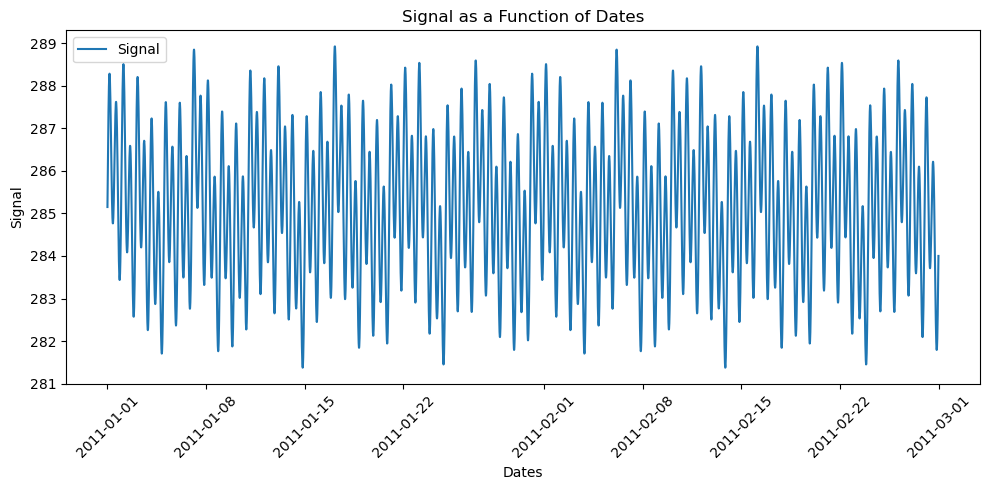

Single periodic signal detected, using create_periodic_signal function.
Entering T_aq generation with amplitude 0, period of -9999, offset 285.15, dt 900.0 --> 
constant signal

Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [285.14999542 285.41723785 285.68093262 ... 283.83639679 284.05852661
 284.28779755]
Temperature of Sensor 1 : [285.14999695 285.32815857 285.50395508 ... 284.27426453 284.42235107
 284.57519836]
Temperature of Sensor 2 : [285.14999847 285.23907928 285.32697754 ... 284.71213226 284.78617554
 284.86259918]
Temperature of Sensor 3 : [285.15 285.15 285.15 ... 285.15 285.15 285.15]


In [47]:
"""Instanciation de l'objet Time_series"""
# un dictionnaire qui facilite le paramétrage avec des variables globales définies plus haut
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal":liste_params_river, #list of list for multiperiodic signal
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
}
# instanciation du simulateur de données
emu_observ_test_user1 = synthetic_MOLONARI.from_dict(time_series_dict_user1)

# print("Checking params synthetic_MOLONARI")
# print("param_time_dates:", emu_observ_test_user1._param_dates)
# print("param_dH_signal:", emu_observ_test_user1._param_dH)
# print("param_T_riv_signal:", emu_observ_test_user1._param_T_riv)
# print("param_T_aq_signal:", emu_observ_test_user1._param_T_aq)
# print("sigma_meas_P:", emu_observ_test_user1._sigma_P)
# print("sigma_meas_T:", emu_observ_test_user1._sigma_T)


# print(f"dH : {emu_observ_test_user1._molonariP_data}")
# print(f"Tshaft : {emu_observ_test_user1._T_Shaft_measures}")


### Quick spectral analysis of the signal.

Text(0, 0.5, 'River Temperature (K)')

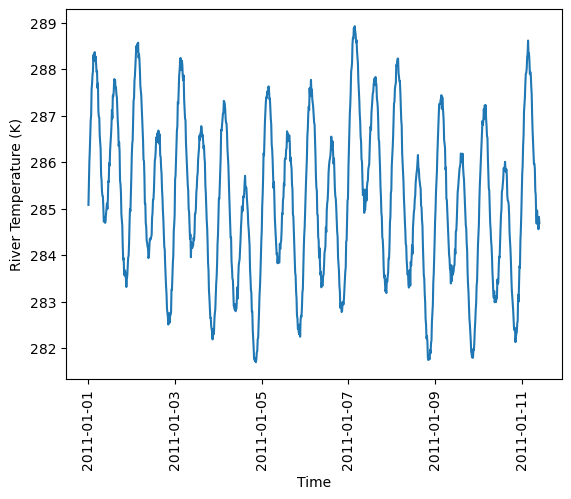

In [48]:
plt.plot(emu_observ_test_user1._dates[:1000], emu_observ_test_user1._T_riv[:1000])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('River Temperature (K)')

Dominant period ≈ 0.5000 days (freq = 2.315e-05 Hz)


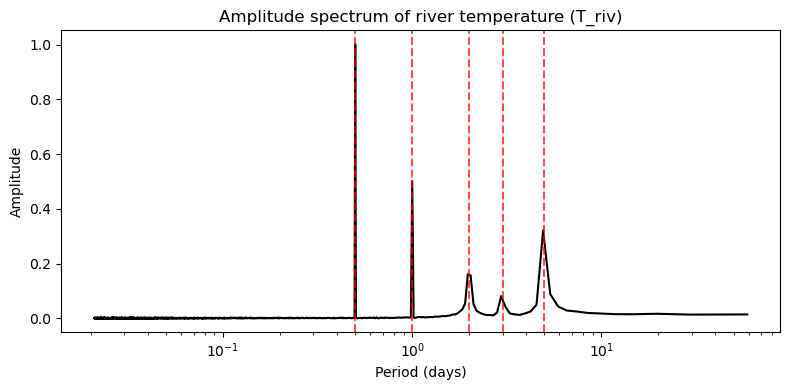

In [49]:
# Simple spectrum of the river temperature signal (T_riv)
y = np.asarray(emu_observ_test_user1._T_riv)
n = y.size
y = y - np.mean(y)   # remove DC

yf = np.fft.rfft(y)
amp = np.abs(yf) / n
freqs = np.fft.rfftfreq(n, d=dt)  # cycles per second

mask = freqs > 0
period_days = 1.0 / freqs[mask] / NSECINDAY  # convert period to days

plt.figure(figsize=(8, 4))
plt.plot(period_days, amp[mask], '-k')
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum of river temperature (T_riv)')

# mark the input forcing periods (if defined in liste_params_river)
try:
    input_periods = [p[1] for p in liste_params_river if p[1] > 0]
    for p in input_periods:
        plt.axvline(p / NSECINDAY, color='r', linestyle='--', alpha=0.7)
except Exception:
    pass

# report dominant period
if amp[mask].size:
    idx = np.argmax(amp[mask])
    dom_period_days = period_days[idx]
    print(f"Dominant period ≈ {dom_period_days:.4f} days (freq = {freqs[mask][idx]:.3e} Hz)")

plt.tight_layout()
plt.show()

Maintenant on génère la couche

In [50]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Couche = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "moinslog10IntrinK":11,
    "n": 0.1,
    "lambda_s": 1,
    "rhos_cs": 4e6,
    "q": 0,
}

# modèle une couche
Layer1 = Layer.from_dict(Couche)

print(f"Layer: {Layer1}")

nbcells = 100
# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
col_dict = {
	"river_bed": 4, 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._molonariP_data,
    "T_measures": emu_observ_test_user1._T_Shaft_measures,
    "nb_cells" : nbcells,
    "sigma_meas_P": 0.01, #float
    "sigma_meas_T": 0.1, #float
}
col = Column.from_dict(col_dict,verbose=True)
col.set_layers(Layer1)

Layer: Couche en sable : ends at 4 m. Param(moinslog10IntrinK=11, n=0.1, lambda_s=1, rhos_cs=4000000.0, q=0)
Column created with success
Number of time steps: 5664
Time step in days: 0.01041482756591337
T_riv: [285.08026 285.5162  285.98553 ... 283.27524 283.8125  284.01428]
T_aq: [285.05651368 285.06729469 285.30243925 ... 285.11251175 285.18676774
 285.04983267]
dH : [0.99915594 1.00111148 0.99974094 ... 1.00038475 1.00261724 1.00254458]
list of dates   : [datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 15), datetime.datetime(2011, 1, 1, 0, 30), datetime.datetime(2011, 1, 1, 0, 45), datetime.datetime(2011, 1, 1, 1, 0), datetime.datetime(2011, 1, 1, 1, 15), datetime.datetime(2011, 1, 1, 1, 30), datetime.datetime(2011, 1, 1, 1, 45), datetime.datetime(2011, 1, 1, 2, 0), datetime.datetime(2011, 1, 1, 2, 15), datetime.datetime(2011, 1, 1, 2, 30), datetime.datetime(2011, 1, 1, 2, 45), datetime.datetime(2011, 1, 1, 3, 0), datetime.datetime(2011, 1, 1, 3, 15), datetime.

In [51]:
col.compute_solve_transi()

--- Compute Solve Transi ---
One layer : moinslog10IntrinK = 11, n = 0.1, lambda_s = 1, rhos_cs = 4000000.0, q = 0
Solving the flow with intrinsec permeability 1e-11, and permeability 9.810000000000001e-05
Done.


## 3 Generating temperature in the river bed

We use the [_measures_column_one_layer(col, layers_list)] method, which updates the measurements for T1, T2 and T3 at each point in time with the direct model pyheatmy. The sensor time series are then perturbated with a gaussian noise in the Time series object. We display the temperature simulated at sensors.

In [52]:
# print(emu_observ_test_user1._T_Shaft)
emu_observ_test_user1._measures_column_one_layer(col)
#emu_observ_test_user1._plot_molonariT_data()
#col.plot_temperature_at_sensors(verbose=False)

The simulated temperatures with pyheatmy are compared to the initial values of the Shaft which were interpolated. Without surprise, they are very different for an advective configuration (high k value)

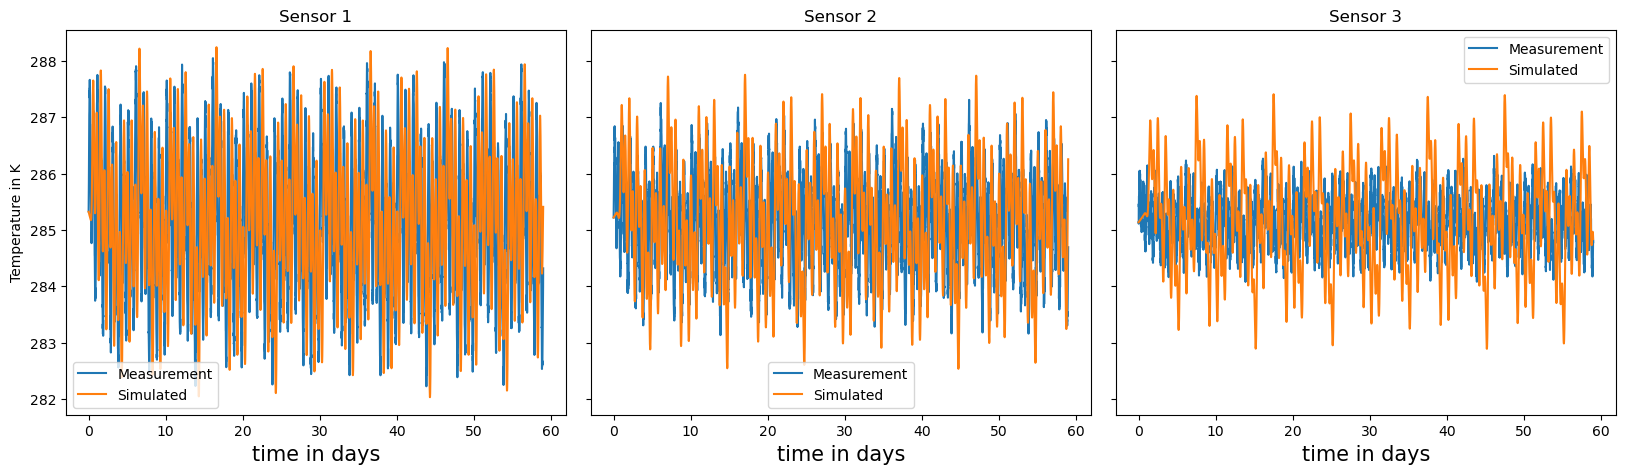

In [53]:
col.plot_compare_temperatures_sensors()

### On récupère les profils issus des capteurs.

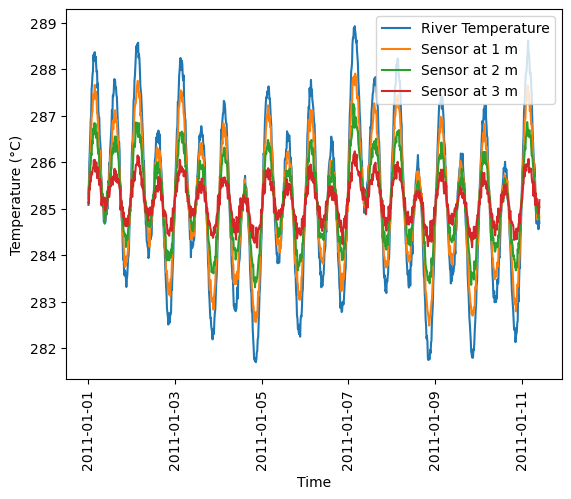

In [54]:
plt.plot(emu_observ_test_user1._dates[:1000], emu_observ_test_user1._T_riv[:1000], label="River Temperature")

for i in range(3):
    plt.plot(emu_observ_test_user1._dates[:1000], col._T_measures[:, i][:1000], label=f"Sensor at {depth_sensors[i]} m")
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()

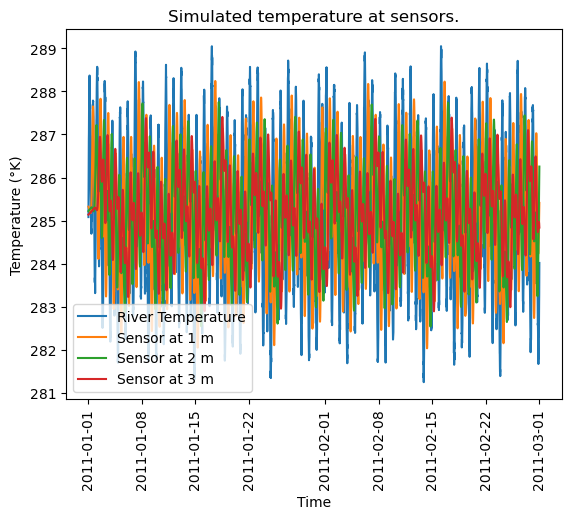

In [55]:
temperatures_mes = col.get_temperature_at_sensors()

plt.plot(emu_observ_test_user1._dates, emu_observ_test_user1._T_riv, label="River Temperature")
for i in range(1, 4):
    plt.plot(emu_observ_test_user1._dates, temperatures_mes[i], label=f"Sensor at {depth_sensors[i-1]} m")


plt.title("Simulated temperature at sensors.")
plt.xlabel('Time')
plt.ylabel('Temperature (°K)')
plt.xticks(rotation=90)
plt.legend()

In [56]:
idx_begin = 200
idx_end = 3000

dates_mes = emu_observ_test_user1._dates[idx_begin:idx_end].copy()

# Truncate the time axis of temperatures_mes to the selected window.
# temperatures_mes is a numpy array shaped (n_signals, n_time), so slice on axis 1.
temperatures_mes = temperatures_mes[:, idx_begin:idx_end]



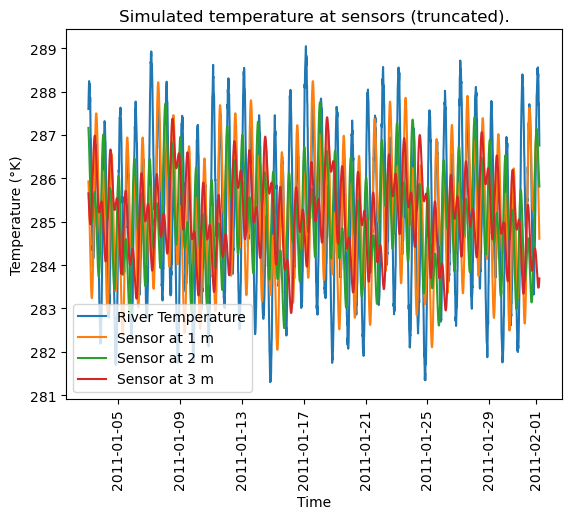

In [57]:
plt.plot(dates_mes, temperatures_mes[0], label="River Temperature")
for i in range(1, 4):
    plt.plot(dates_mes, temperatures_mes[i], label=f"Sensor at {depth_sensors[i-1]} m")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°K)")
plt.title("Simulated temperature at sensors (truncated).")
plt.xticks(rotation=90)
plt.show()

Defining what are the signals of interest.

In [58]:
signals = [
    temperatures_mes[0],  # River temperature
    temperatures_mes[1],  # Sensor at depth_sensors[0]
    temperatures_mes[2],  # Sensor at depth_sensors[1]
    temperatures_mes[3],  # Sensor at depth_sensors[2]
]

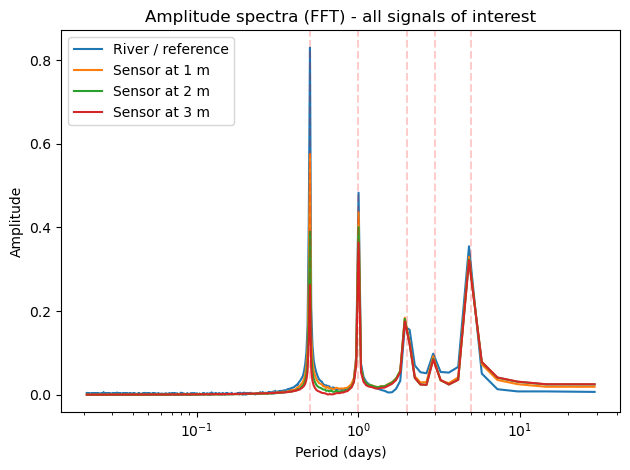

In [59]:
# FFT of the signals of interest on a single plot
sig_arr = np.asarray(signals)           # shape (n_signals, n_time)
n_signals, n_time = sig_arr.shape

freqs = np.fft.rfftfreq(n_time, d=dt)  # cycles per second
mask = freqs > 0
period_days = 1.0 / freqs[mask] / NSECINDAY

plt.figure(figsize=(6.4, 4.8))
cmap = plt.get_cmap("tab10")
for i in range(n_signals):
    y = sig_arr[i].astype(float)
    y -= np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time
    label = "River / reference" if i == 0 else f"Sensor at {depth_sensors[i-1]} m"
    plt.plot(period_days, amp[mask], color=cmap(i % 10), label=label)

# mark input forcing periods (if available)
try:
    input_periods_days = [p[1] / NSECINDAY for p in liste_params_river if p[1] > 0]
    for pday in input_periods_days:
        plt.axvline(pday, color='r', linestyle='--', alpha=0.2)
except Exception:
    pass

plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectra (FFT) - all signals of interest')
plt.legend()
plt.tight_layout()
plt.show()

Now extract the amplitudes at the peaks.

In [115]:
# Create the list of amplitudes for each input period.

amplitudes_at_peaks = []

for i in range(n_signals):
    
    y = sig_arr[i].astype(float)
    y -= np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time

    phase = np.angle(yf)
    
    # Now find the amplitudes corresponding to the input periods.
    amps_for_signal = []
    for p in input_periods_days:
        # Find the index of the closest frequency to the input period.
        target_freq = 1.0 / (p * NSECINDAY)
        idx = (np.abs(freqs - target_freq)).argmin()
        amps_for_signal.append(amp[idx])

    amplitudes_at_peaks.append(amps_for_signal)

amplitudes_at_peaks = np.array(amplitudes_at_peaks)  # shape (n_signals, n_input_periods)
print(amplitudes_at_peaks)

[[0.48301663 0.8296924  0.16287049 0.09838869 0.35494032]
 [0.43642181 0.57546556 0.18430974 0.09230798 0.32994888]
 [0.40049129 0.38996466 0.18133857 0.0860596  0.32299741]
 [0.36310879 0.26166508 0.17524735 0.08424916 0.32128649]]


Now we can try to fit to a power law $-a z$, the decay of the amplitudes for each period.

Amplitudes for River / reference: [0.48301663 0.8296924  0.16287049 0.09838869 0.35494032]
Amplitudes for Sensor at 1 m: [0.43642181 0.57546556 0.18430974 0.09230798 0.32994888]
Amplitudes for Sensor at 2 m: [0.40049129 0.38996466 0.18133857 0.0860596  0.32299741]
Amplitudes for Sensor at 3 m: [0.36310879 0.26166508 0.17524735 0.08424916 0.32128649]


Text(0, 0.5, 'Amplitude at peak')

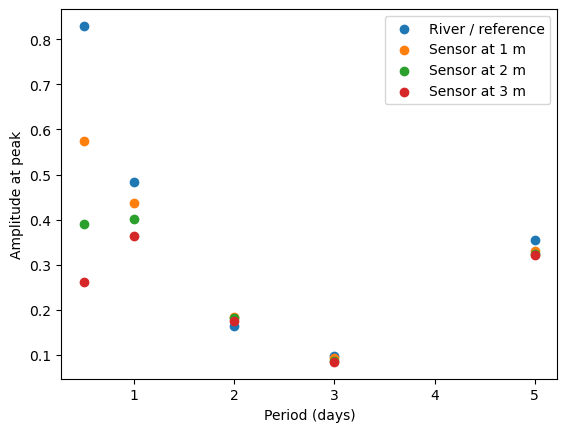

In [89]:
for i in range(n_signals):
    label = "River / reference" if i == 0 else f"Sensor at {depth_sensors[i-1]} m"
    print(f"Amplitudes for {label}: {amplitudes_at_peaks[i]}")

for i in range(n_signals):
    plt.scatter(input_periods_days, amplitudes_at_peaks[i], marker='o', label=("River / reference" if i == 0 else f"Sensor at {depth_sensors[i-1]} m"))

plt.legend()
plt.xlabel("Period (days)")
plt.ylabel("Amplitude at peak")

In [90]:
input_periods_days

[1.0, 0.5, 2.0, 3.0, 5.0]


--- Analyse de l'amortissement de l'amplitude avec la profondeur ---


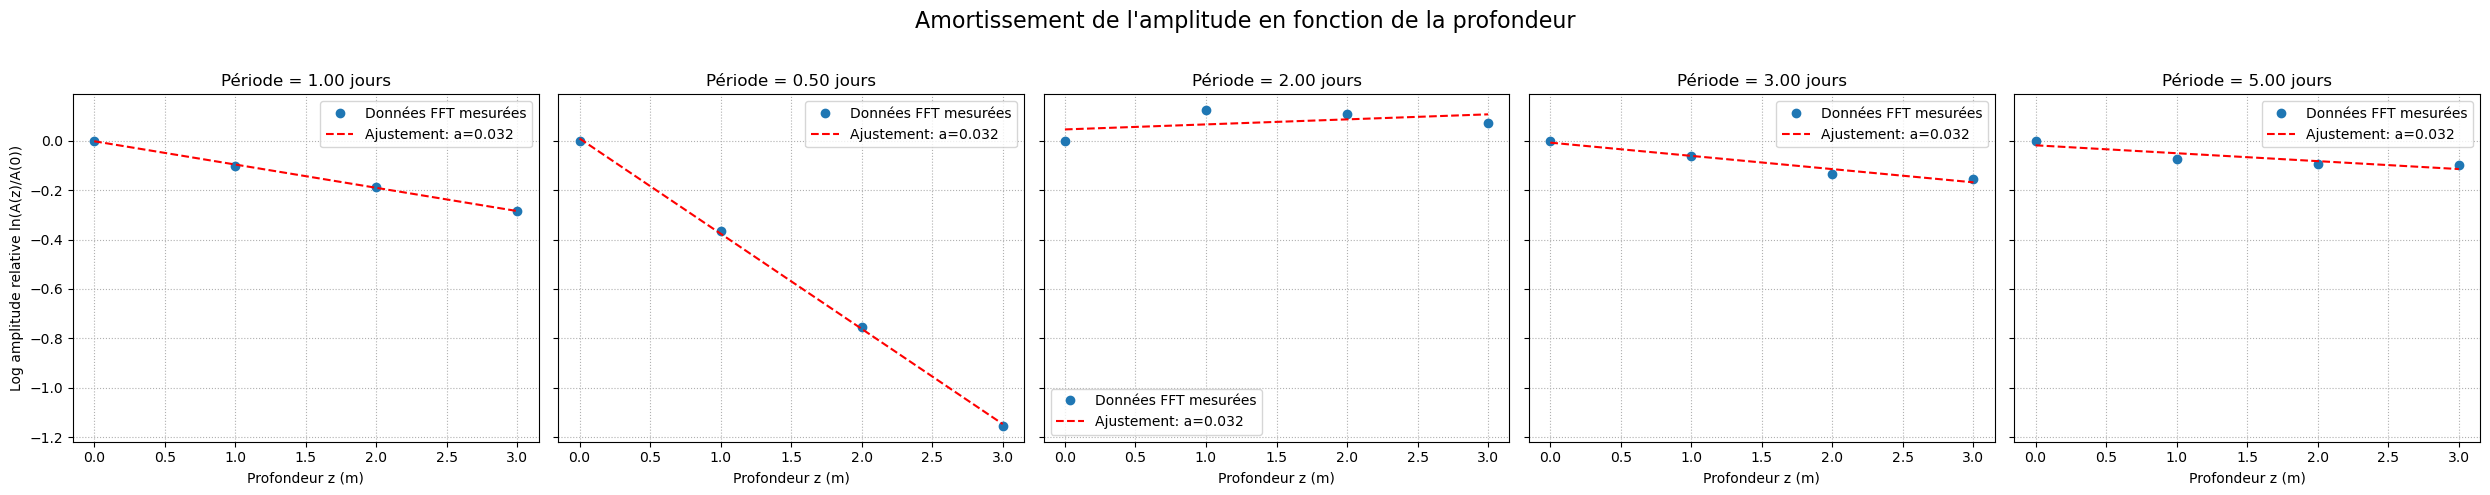

In [106]:
z_values = np.array([0] + depth_sensors[:-1]) 
n_periods = len(input_periods_days)

# --- Création de la figure avec des subplots ---
# Un subplot par période. sharey=True est utile car l'échelle (0 à 1) est la même.
fig, axs = plt.subplots(1, n_periods, figsize=(5 * n_periods, 5), sharey=True)

# S'il n'y a qu'un seul subplot, axs n'est pas un tableau. On le met dans une liste pour que la boucle fonctionne.
if n_periods == 1:
    axs = [axs]

print("\n--- Analyse de l'amortissement de l'amplitude avec la profondeur ---")

# Boucle sur chaque période de forçage pour créer un subplot
for i, period in enumerate(input_periods_days):
    ax = axs[i] # Sélectionne l'axe du subplot courant

    # Extraire les amplitudes pour cette période
    amplitudes_for_period = amplitudes_at_peaks[:, i]
    
    # Amplitude de la rivière (référence à z=0)
    amplitude_river = amplitudes_for_period[0]
    
    # Calculer l'amplitude relative A(z)/A(0)
    if amplitude_river > 0:
        amplitude_ratio = amplitudes_for_period / amplitude_river
    else:
        # Éviter la division par zéro si l'amplitude de la rivière est nulle
        amplitude_ratio = np.full_like(amplitudes_for_period, np.nan)
    
    log_amplitude_ratio = np.log(amplitude_ratio)


    # Tracer les données "mesurées" (points)
    ax.plot(z_values, log_amplitude_ratio, 'o', label='Données FFT mesurées')

    # Fit ln(A(z)/A(0)) = -az
    if np.all(np.isfinite(log_amplitude_ratio)):
        # Ajustement linéaire pour trouver a
        coeffs = np.polyfit(z_values, log_amplitude_ratio, 1)
        a_fit = -coeffs[0]
        ax.plot(z_values, np.polyval(coeffs, z_values), 'r--', label=f'Ajustement: a={k_fit:.3f}')

    # Mise en forme du subplot
    ax.set_title(f'Période = {period:.2f} jours')
    ax.set_xlabel('Profondeur z (m)')
    ax.legend()
    ax.grid(True, which='both', linestyle=':')

# Mise en forme globale de la figure
axs[0].set_ylabel('Log amplitude relative ln(A(z)/A(0))') # Label Y uniquement pour le premier graphique
fig.suptitle("Amortissement de l'amplitude en fonction de la profondeur", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajuste pour laisser de la place au titre principal
plt.show()


Extract the phase shifts. For a given period, compute the phase $\phi(P)$ and make it unwrapped. Then compare the phase for a given period between the depths.

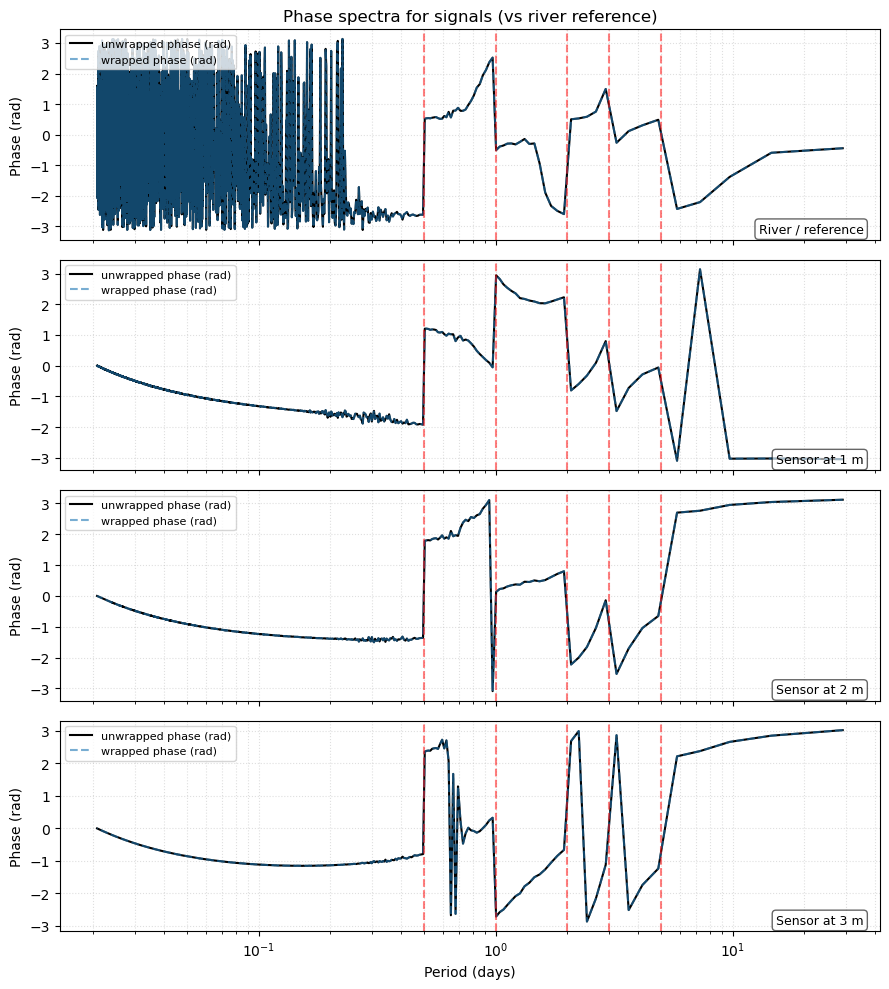

In [117]:
# Plot phase (radians) for each signal vs period (days)
# Uses existing variables: phases (shape: n_signals x n_freqs), period_days, depth_sensors, liste_params_river

n_signals, n_freqs = phases.shape

fig, axes = plt.subplots(n_signals, 1, figsize=(9, 2.5 * n_signals), sharex=True)
if n_signals == 1:
    axes = [axes]

# input forcing periods (days) if available
try:
    input_periods_days = [p[1] / NSECINDAY for p in liste_params_river if p[1] > 0]
except Exception:
    input_periods_days = []

for i in range(n_signals):
    ax = axes[i]
    ph = phases[i]
    # unwrapped phase (already unwrapped in computation) and wrapped phase for visualization
    ph_wrapped = (np.mod(ph + np.pi, 2 * np.pi) - np.pi)

    ax.plot(period_days, ph, '-k', label='unwrapped phase (rad)')
    ax.plot(period_days, ph_wrapped, '--', alpha=0.6, label='wrapped phase (rad)')
    ax.set_xscale('log')
    ax.set_ylabel('Phase (rad)')
    if i == 0:
        ax.set_title('Phase spectra for signals (vs river reference)')
        label = "River / reference"
    else:
        depth_label = depth_sensors[i-1] if (i-1) < len(depth_sensors) else f"idx {i}"
        label = f"Sensor at {depth_label} m"
    ax.text(0.98, 0.02, label, transform=ax.transAxes, ha='right', va='bottom', fontsize=9,
            bbox=dict(boxstyle='round', fc='white', alpha=0.6))

    for pday in input_periods_days:
        ax.axvline(pday, color='r', linestyle='--', alpha=0.5)

    ax.grid(True, which='both', ls=':', alpha=0.4)
    ax.legend(loc='upper left', fontsize=8)

axes[-1].set_xlabel('Period (days)')
plt.tight_layout()
plt.show()

In [118]:
# Recompute phases using full FFT (np.fft.fft) instead of rfft.
# Uses existing variables in the notebook: signals, dt, NSECINDAY, peak_indices, peak_freqs

sig_arr = np.asarray(signals)            # shape (n_signals, n_time)
n_signals, n_time = sig_arr.shape

# full FFT and frequency axis
yf_full = np.fft.fft(sig_arr, axis=1)    # shape (n_signals, n_time)
freqs_full = np.fft.fftfreq(n_time, d=dt)  # cycles per second

# keep only positive frequencies (matches rfft output length)
pos_idx = np.where(freqs_full > 0)[0]
period_days_axis = 1.0 / freqs_full[pos_idx] / NSECINDAY

# phases for all positive freqs (overwrite previous 'phases' for downstream cells)
phases = np.angle(yf_full)[:, pos_idx]   # shape (n_signals, n_pos_freqs)

# Extract phases at previously found peak indices (these indices correspond to rfft indices)
phases_at_peaks = phases[:, peak_indices]   # shape (n_signals, n_peaks)

# Phase difference relative to river (first row)
phase_diff = phases_at_peaks - phases_at_peaks[0:1, :]

# Wrap phase difference to [-pi, pi]
phase_diff_wrapped = (phase_diff + np.pi) % (2 * np.pi) - np.pi

# Convert phase difference (rad) to time lag (hours): dt_sec = phase / (2*pi*freq), freq = peak_freqs (Hz)
time_lag_hours = phase_diff_wrapped / (2 * np.pi * peak_freqs[np.newaxis, :]) / 3600.0

# Save results for inspection by other cells
phases_fft = np.angle(yf_full)           # full-phase matrix (n_signals, n_time)
phases_at_peaks_fft = phases_at_peaks
phase_diff_peaks_fft = phase_diff_wrapped
time_lag_hours_peaks = time_lag_hours

# Quick print summary for the first few peaks
for i in range(min(5, peak_indices.size)):
    print(f"Peak {i}: period={peak_periods_days[i]:.3f} d, freq={peak_freqs[i]:.3e} Hz, "
          f"phase_diff_rad={phase_diff_wrapped[:, i]}, lag_h={time_lag_hours[:, i]}")

Peak 0: period=4.861 d, freq=2.381e-06 Hz, phase_diff_rad=[ 0.         -0.59157395 -1.34731192 -2.04924906], lag_h=[  0.         -10.98439052 -25.01699111 -38.05061372]
Peak 1: period=2.917 d, freq=3.968e-06 Hz, phase_diff_rad=[ 0.         -0.66371887 -1.79380526 -2.91394251], lag_h=[  0.          -7.39438971 -19.98450817 -32.46378477]
Peak 2: period=1.944 d, freq=5.952e-06 Hz, phase_diff_rad=[ 0.         -1.63247267 -3.07584946  1.64668265], lag_h=[  0.         -12.12475112 -22.84504345  12.23029191]
Peak 3: period=1.006 d, freq=1.151e-05 Hz, phase_diff_rad=[ 0.         -2.57595568  0.67328614 -2.19465652], lag_h=[ 0.         -9.89597434  2.58654388 -8.43114841]
Peak 4: period=0.748 d, freq=1.548e-05 Hz, phase_diff_rad=[ 0.          0.0386626   1.59895859 -1.25132323], lag_h=[ 0.          0.11044462  4.56762857 -3.57456394]


### Spectral analysis of the signals extracted from the sensors.

In [16]:
# build temperatures_capteurs: first row = river temperature, next rows = sensors (from col._T_measures)
river = np.asarray(emu_observ_test_user1._T_riv)
sensors = np.asarray(col._T_measures)  # expected shape (n_time, n_sensors)

# ensure sensors are (n_sensors, n_time)
sensors_T = sensors.T if sensors.ndim == 2 else np.atleast_2d(sensors).T

temperatures_capteurs = np.vstack([river, sensors_T]).astype(float)

print("temperatures_capteurs shape:", temperatures_capteurs.shape)

temperatures_capteurs shape: (4, 5664)


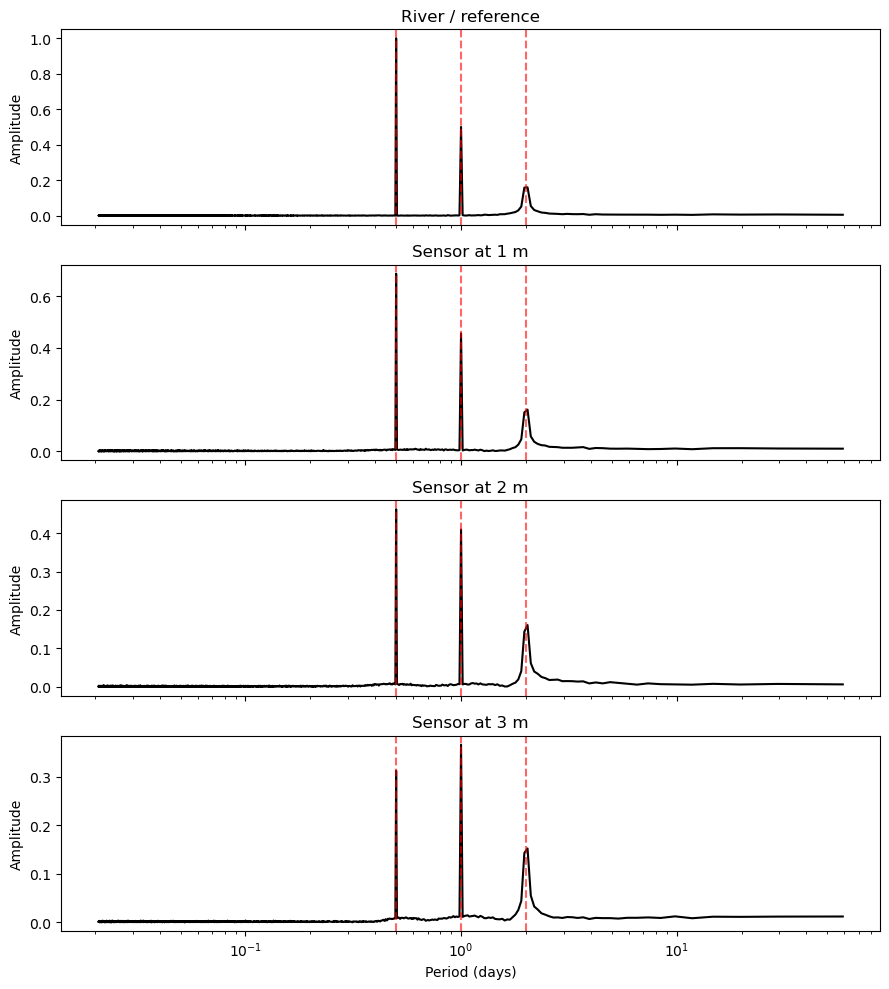

In [17]:
# FFT for each sensor signal (uses existing variables: temperatures_capteurs, dt, NSECINDAY, liste_params_river, depth_sensors)
signals = np.asarray(temperatures_capteurs)  # shape: (n_signals, n_time)
n_signals, n_time = signals.shape

fig, axes = plt.subplots(n_signals, 1, figsize=(9, 2.5 * n_signals), sharex=True)
if n_signals == 1:
    axes = [axes]

freqs = np.fft.rfftfreq(n_time, d=dt)  # cycles per second
mask = freqs > 0
period_days = 1.0 / freqs[mask] / NSECINDAY

# input forcing periods (in days) if available
input_periods_days = []
try:
    input_periods_days = [p[1] / NSECINDAY for p in liste_params_river if p[1] > 0]
except Exception:
    pass

for i in range(n_signals):
    y = signals[i].astype(float)
    y = y - np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time

    ax = axes[i]
    ax.plot(period_days, amp[mask], '-k')
    ax.set_xscale('log')
    ax.set_ylabel('Amplitude')
    # label first row as "River" and the rest with sensor depths if available
    if i == 0:
        label = "River / reference"
    else:
        depth_label = depth_sensors[i-1] if (i-1) < len(depth_sensors) else f"idx {i}"
        label = f"Sensor at {depth_label} m"
    ax.set_title(label)

    for pday in input_periods_days:
        ax.axvline(pday, color='r', linestyle='--', alpha=0.6)

axes[-1].set_xlabel('Period (days)')
plt.tight_layout()
plt.show()

Now plot everything in the same plot

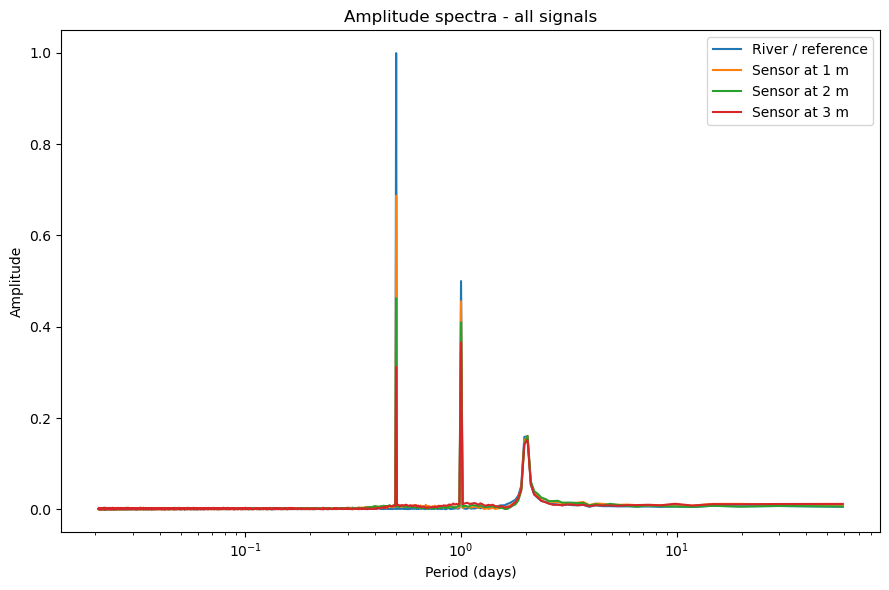

In [18]:
freqs = np.fft.rfftfreq(n_time, d=dt)
mask = freqs > 0
period_days = 1.0 / freqs[mask] / NSECINDAY

plt.figure(figsize=(9, 6))
cmap = plt.get_cmap("tab10")
for i in range(signals.shape[0]):
    y = signals[i].astype(float)
    y = y - np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time
    label = "River / reference" if i == 0 else f"Sensor at {depth_sensors[i-1]} m"
    plt.plot(period_days, amp[mask], color=cmap(i), label=label)

plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectra - all signals')
plt.legend()
plt.tight_layout()
plt.show()

##### Retrieving $a$.

Now we identify the dominant peaks for each signal, compute their amplitudes and the dephasing compared to the river reference.

Here are temperature profiles simulated by pyheatmy

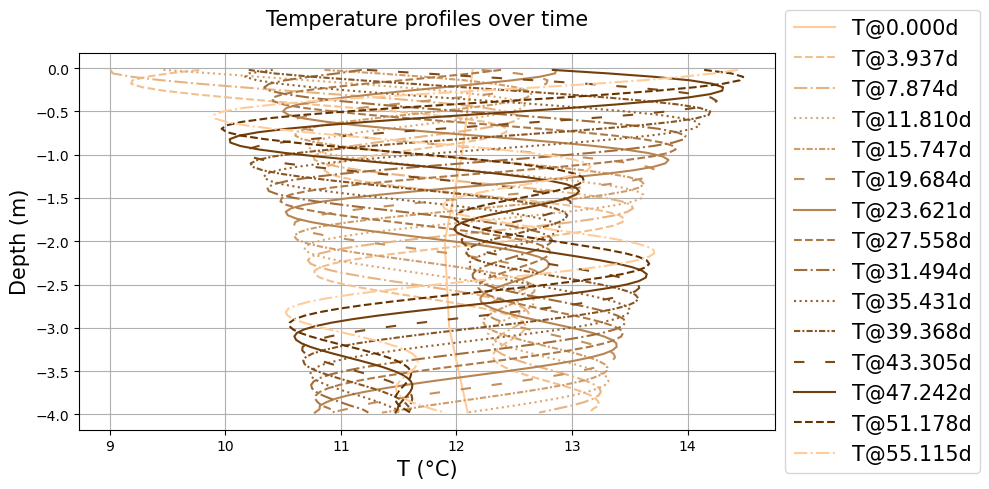

In [200]:
nt = len(col._temperatures[0,:])
dplot=15
col.plot_temperatures_umbrella(round(nt/dplot))



Now creating a new column created with the generated case study

[(datetime.datetime(2011, 1, 1, 0, 0), array([285.3412788 , 285.23915121, 285.36987721, 284.65930358])), (datetime.datetime(2011, 1, 1, 0, 15), array([285.16854427, 285.19621047, 285.18761509, 285.25087844])), (datetime.datetime(2011, 1, 1, 0, 30), array([285.2513371 , 285.31552295, 285.35806614, 285.1863788 ])), (datetime.datetime(2011, 1, 1, 0, 45), array([285.25008534, 285.18555553, 285.24883335, 285.29928465])), (datetime.datetime(2011, 1, 1, 1, 0), array([285.23030101, 285.09662544, 285.19643303, 285.06665231])), (datetime.datetime(2011, 1, 1, 1, 15), array([285.25797438, 285.33004964, 285.31061385, 285.11713589])), (datetime.datetime(2011, 1, 1, 1, 30), array([285.36285942, 285.00704944, 285.21190682, 285.35049229])), (datetime.datetime(2011, 1, 1, 1, 45), array([285.38216729, 285.11471795, 285.22666577, 284.82003294])), (datetime.datetime(2011, 1, 1, 2, 0), array([285.03755289, 285.12793482, 285.17328826, 285.39948158])), (datetime.datetime(2011, 1, 1, 2, 15), array([285.3970967

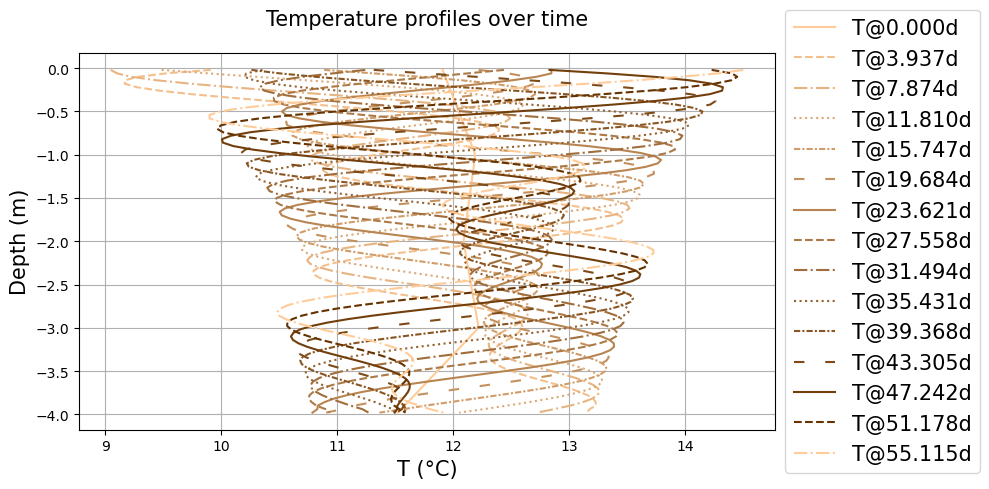

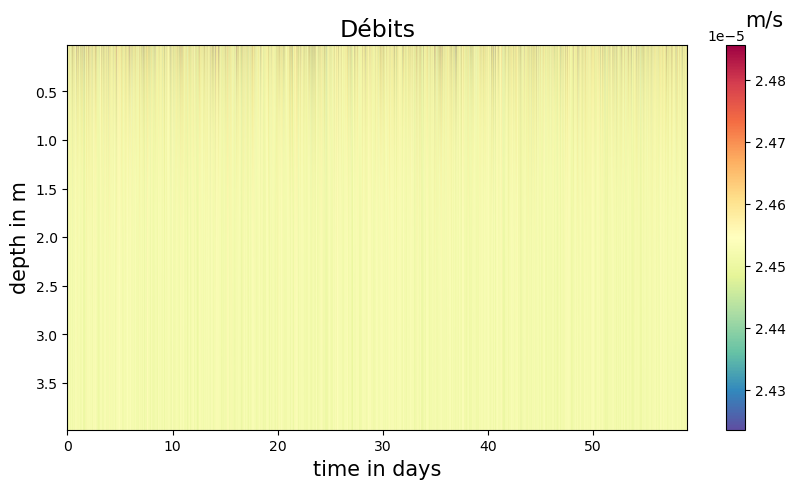

RMSE at sensor 0 : 0.09883862736301527
RMSE at sensor 1 : 0.09960683403165987
RMSE at sensor 2 : 0.10042696977680869
Total RMSE : 0.09962625474470016
Plotting Température in column. time series have nrecords =  5664
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv closed successfully.
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv closed successfully.
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv closed successfully.
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualLabo/pressure_sensors/Pvirtual.csv
Printing Sensor file 1
File /Users/noedaniel

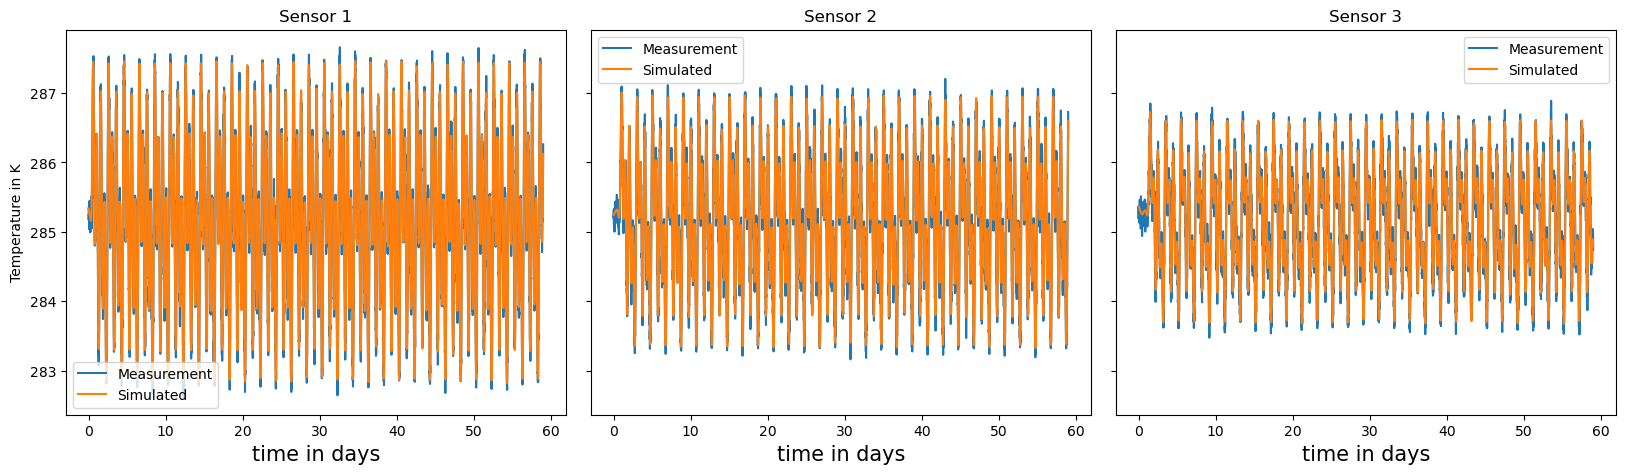

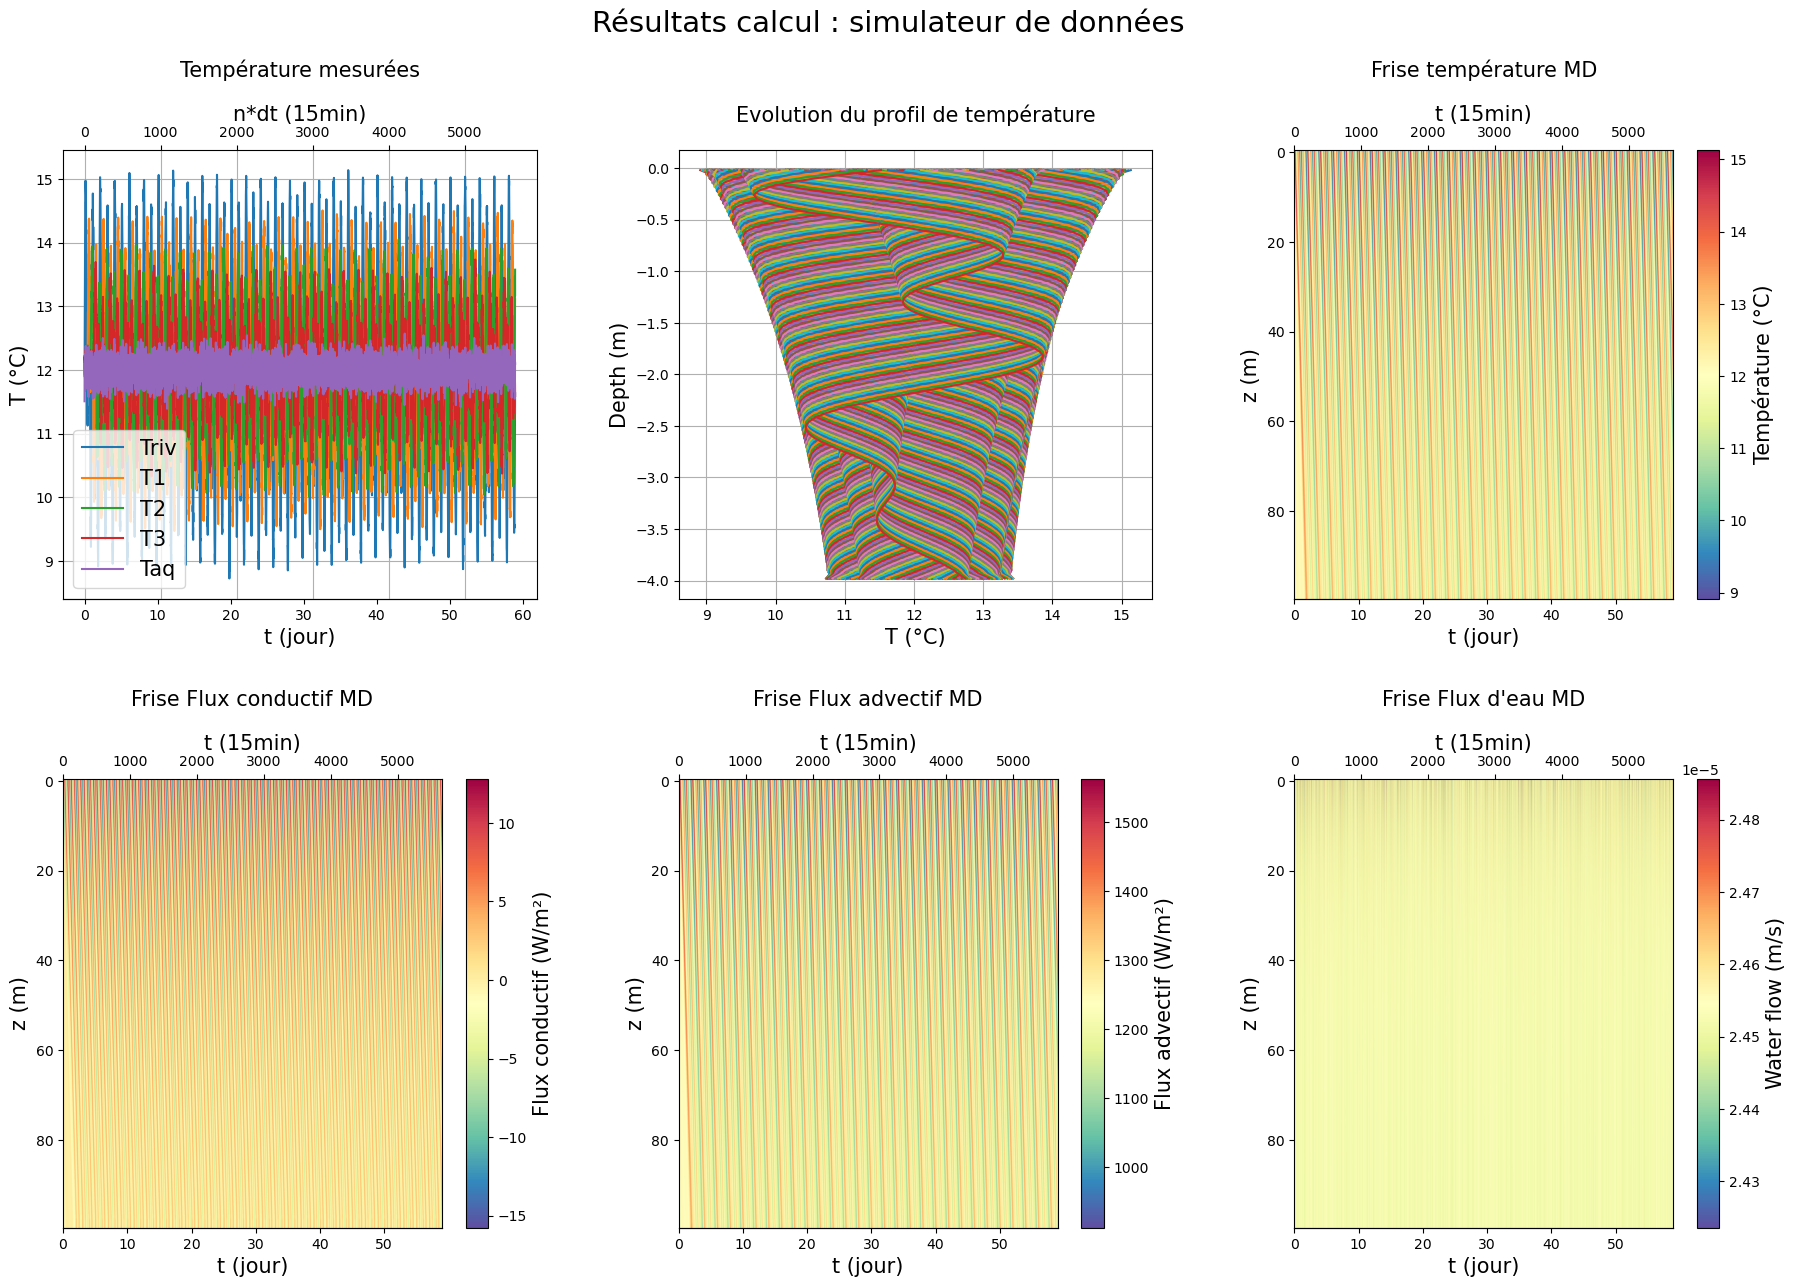

In [20]:
print(emu_observ_test_user1._molonariT_data)

# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._molonariP_data,
    "T_measures": emu_observ_test_user1._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
newCol = Column.from_dict(newCol_dict)
newCol.set_layers(Layer1)
newCol.compute_solve_transi(verbose=True)

nt = len(newCol._temperatures[0,:])
dplot=15
newCol.plot_temperatures_umbrella(round(nt/dplot))

flows = newCol.get_flows_solve()
unitLeg="m/s"
title="Débits"
newCol.plot_it_Zt(flows,title,unitLeg,1.04,2)

newCol.print_RMSE_at_sensor()
newCol.plot_compare_temperatures_sensors()
newCol.plot_CALC_results()
newCol.print_in_file_processed_MOLONARI_dataset(zeroT=0)

# Multilayered riverbed -- No printing option activated

## Warning
It seems that there is a bug at the interface between layers and also if a sensor is located at the interface

In [32]:
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 2
T_riv_offset = 20 + ZERO_CELSIUS
P_T_riv = 72*4*dt

T_aq_amp = 0
T_aq_offset = 14 + ZERO_CELSIUS
P_T_aq = 9999 # à mettre dans le init

dH_amp = 0
dH_offset = 0.1
P_dh = -9999 #14*24*4*dt

Zbottom = 0.6
depth_sensors = [.1, .25, .3, .4, Zbottom] # le code fonctionne avec n capteurs, watch the compatibility with Zbottom

In [33]:
time_series_dict_user4 = {
    "offset" : 0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": 0.05,
    "sigma_meas_T": 0.1, #float
}

param_T_riv_signal is a one level list, generating single periodic signal
Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 900]
param_dH_signal: [0, -9999, 0.1]
param_T_riv_signal: [2, 259200, 293.15]
param_T_aq_signal: [0, 9999, 287.15]
sigma_meas_P: 0.05
sigma_meas_T: 0.1
Entering Hydraulic head differential generation with amplitude 0, period of -9999, offset 0.1, dt 900.0 --> 
constant signal

Single periodic signal detected, using create_periodic_signal function.
Entering T_riv generation with amplitude 2, period of 259200, offset 293.15, dt 900.0 --> 
periodic signal



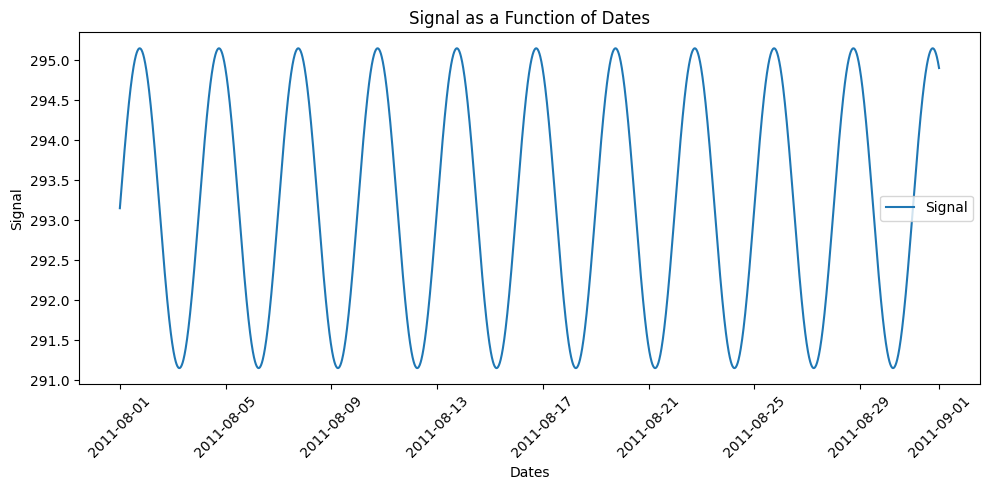

Single periodic signal detected, using create_periodic_signal function.
Entering T_aq generation with amplitude 0, period of 9999, offset 287.15, dt 900.0 --> 
periodic signal



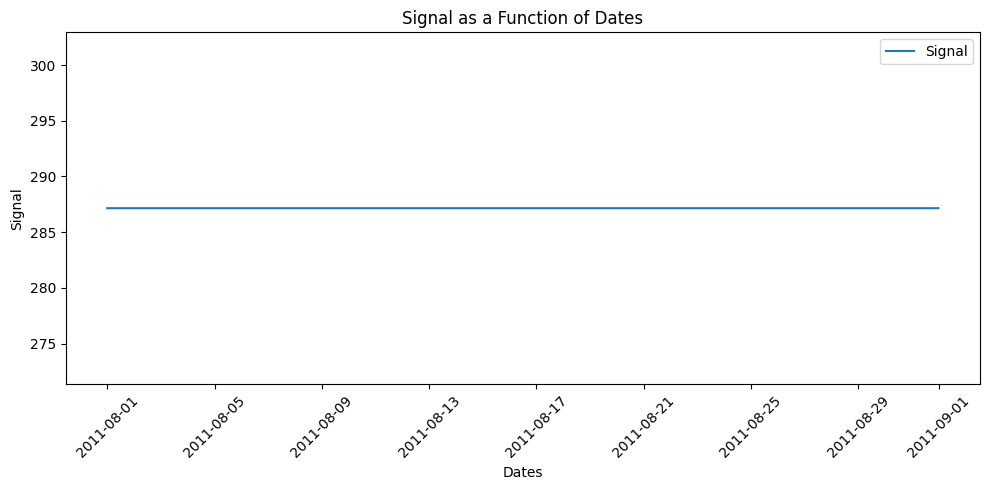

Generating Shaft with 5 sensors
5 sensors in the shaft
Temperature of Sensor 0 : [292.15       292.18635814 292.22269898 ... 293.6447879  293.62835139
 293.61121126]
Temperature of Sensor 1 : [290.65       290.6754507  290.70088929 ... 291.69635153 291.68484597
 291.67284788]
Temperature of Sensor 2 : [290.15       290.17181489 290.19361939 ... 291.04687274 291.03701083
 291.02672676]
Temperature of Sensor 3 : [289.15       289.16454326 289.17907959 ... 289.74791516 289.74134056
 289.7344845 ]
Temperature of Sensor 4 : [287.15 287.15 287.15 ... 287.15 287.15 287.15]


In [34]:
emu_observ_test_user4 = synthetic_MOLONARI.from_dict(time_series_dict_user4)
# emu_observ_test_user4._generate_all_series()



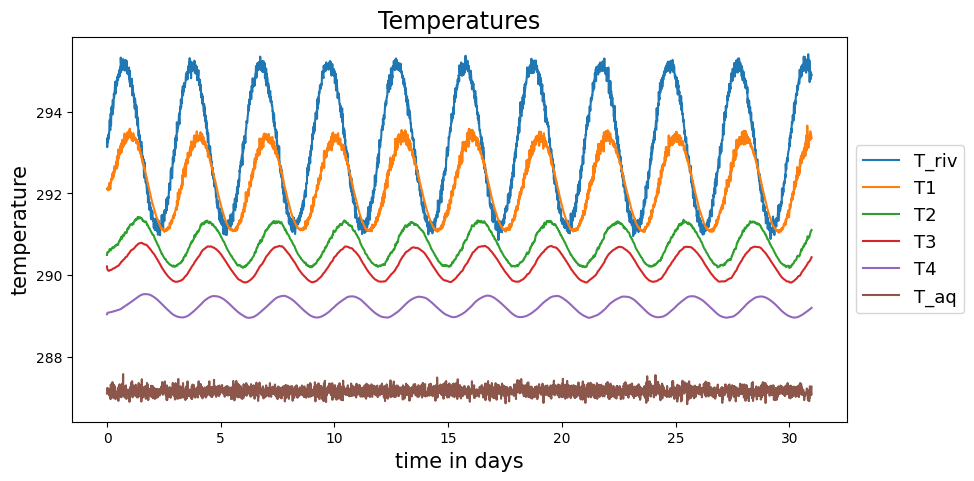

--- Compute Solve Transi ---
gravier : ends at 0.2 m. Param(moinslog10IntrinK=11, n=0.4, lambda_s=2, rhos_cs=4000000.0, q=0)
Couche en sable : ends at 0.6 m. Param(moinslog10IntrinK=14, n=0.1, lambda_s=2, rhos_cs=4000000.0, q=0)
Hinter [0.08834845 0.0883043  0.        ]
conditions aux limites
H_riv [0.08834845 0.06380384 0.04281659 ... 0.12983739 0.08963845 0.10718792]
H_aq [0. 0. 0. ... 0. 0. 0.]
échantillons du profondeur: ...  0.195 0.201  ...
le profondeur d'interface:  0.2
type cara asymetric
Done.


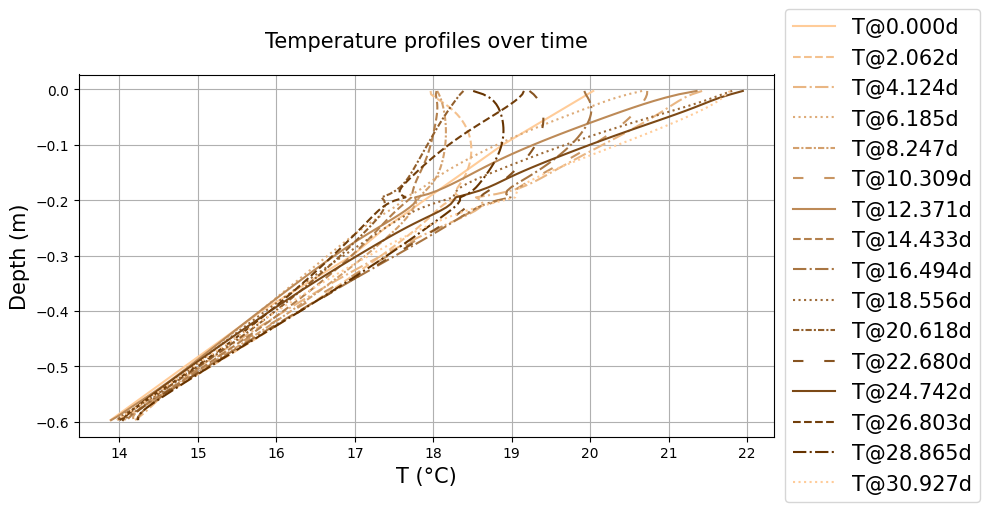

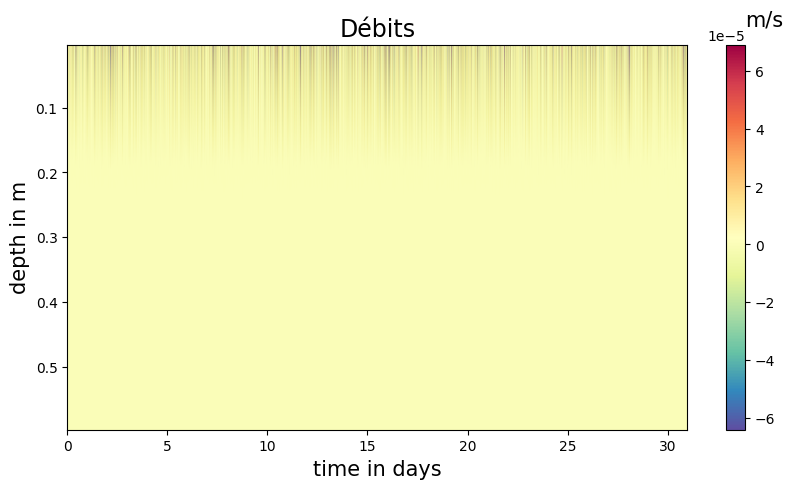

RMSE at sensor 0 : 0.10104331487624119
RMSE at sensor 1 : 0.10020432202047408
RMSE at sensor 2 : 0.10099005076676063
RMSE at sensor 3 : 0.09945804971441966
Total RMSE : 0.10042603203307267
Plotting Température in column. time series have nrecords =  2976


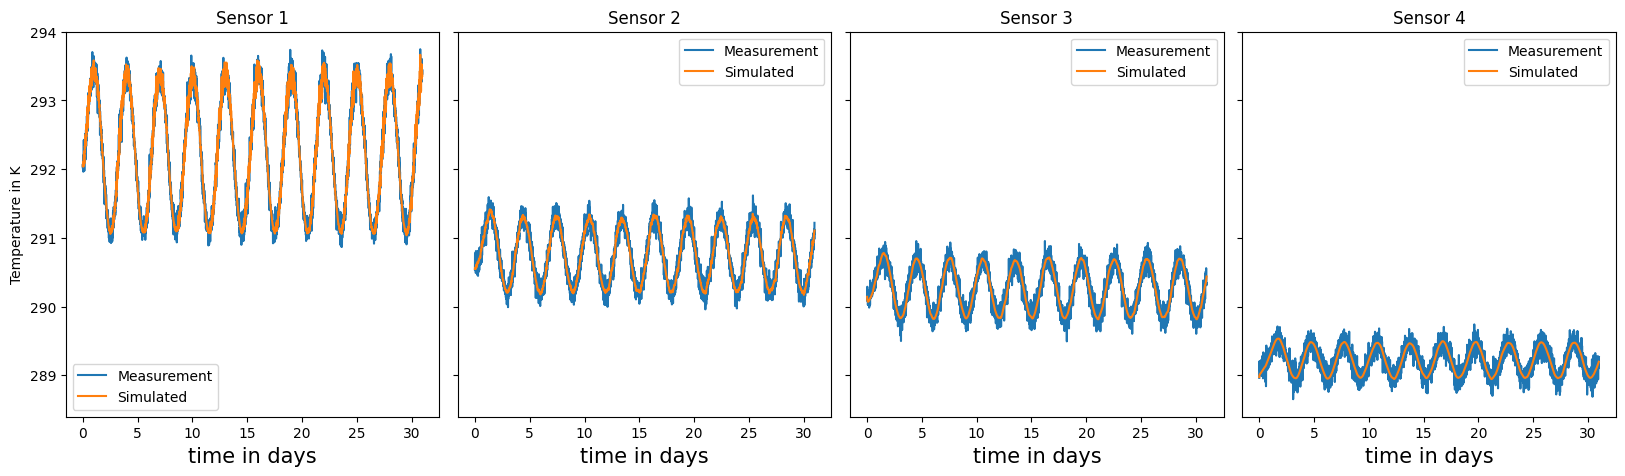

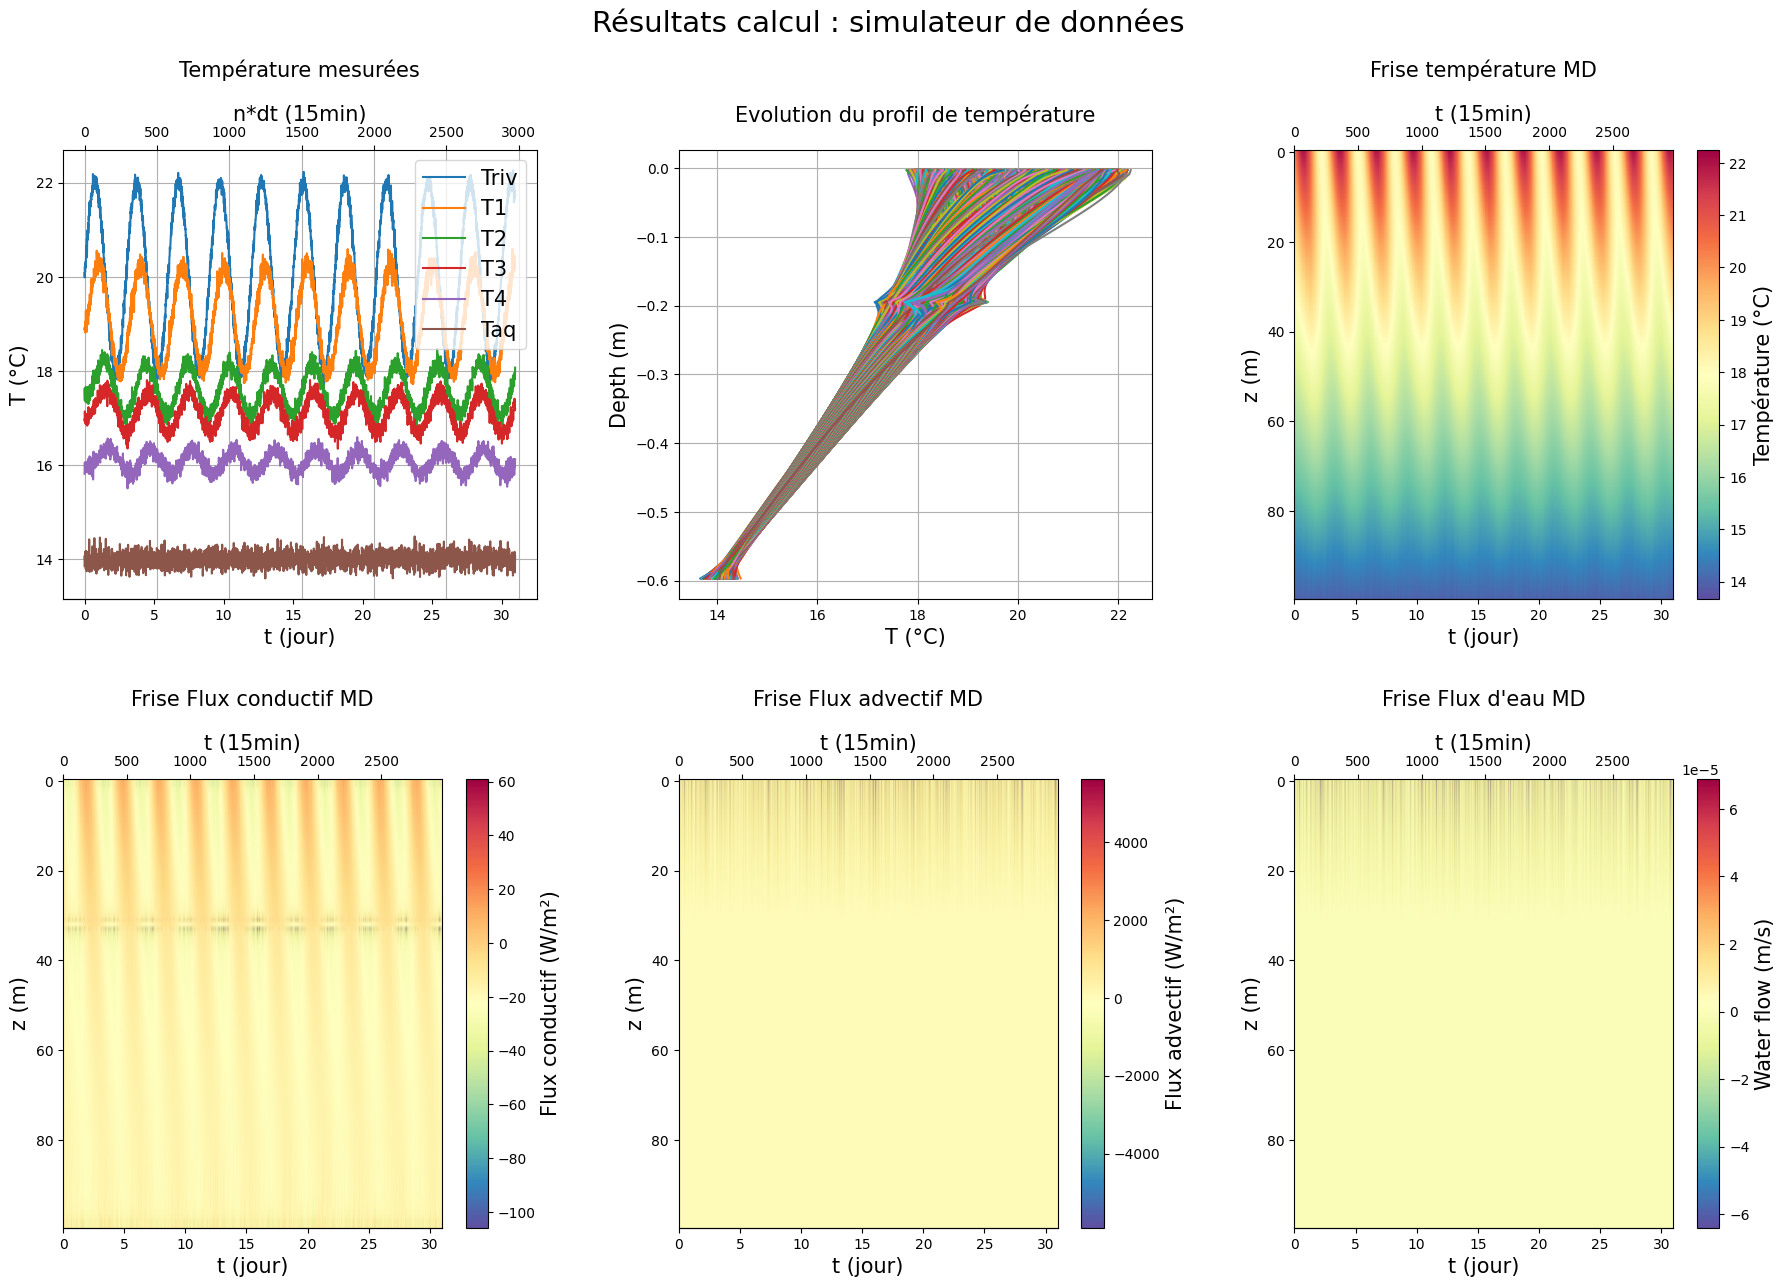

In [35]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Layer1 = {
    "name": "gravier",
    "zLow": .2,
    "moinslog10IntrinK":11,
    "n": .4,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q": 0,
}

Layer2 = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "moinslog10IntrinK":14,
    "n": .1,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q": 0,
}

# on utilise les mesures générées précédemment
col_dict4 = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user4._molonariP_data,
    "T_measures": emu_observ_test_user4._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": emu_observ_test_user4._sigma_P, #float
    "sigma_meas_T": emu_observ_test_user4._sigma_T, #float
}

col4 = Column.from_dict(col_dict4)

# modèle une couche
col4.set_layers([Layer.from_dict(Layer1),Layer.from_dict(Layer2)])

# print(emu_observ_test_user1._T_Shaft)
emu_observ_test_user4._measures_column_one_layer(col4)
#emu_observ_test_user1._plot_molonariT_data()
col4.plot_temperature_at_sensors(verbose=False)


# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol4_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user4._molonariP_data,
    "T_measures": emu_observ_test_user4._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
ncol4 = Column.from_dict(newCol4_dict)
ncol4.set_layers([Layer.from_dict(Layer1),Layer.from_dict(Layer2)])
ncol4.compute_solve_transi(verbose=True)

nt = len(ncol4._temperatures[0,:])
dplot=15
ncol4.plot_temperatures_umbrella(round(nt/dplot))

flows = ncol4.get_flows_solve()
unitLeg="m/s"
title="Débits"
ncol4.plot_it_Zt(flows,title,unitLeg,1.04,2)

ncol4.print_RMSE_at_sensor()
ncol4.plot_compare_temperatures_sensors()
ncol4.plot_CALC_results()
#ncol4.print_in_file_processed_MOLONARI_dataset(zeroT=0) #No printing of the multilayer case study for the usage of demoInversion.ipynb


